<a href="https://colab.research.google.com/github/Gan-Claire/Project_melomane/blob/main/Copy_of_Model_traning_RF_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#import data
file_name = 'normalized_data.csv'
df_music = pd.read_csv(file_name)

In [3]:
#split data
X = df_music.drop(['genre'], axis = 1)
Y = df_music['genre']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [4]:
#test the feature importance
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[0.47010294 0.05292969 0.03868507 0.01537477 0.00737644 0.03583623
 0.02594911 0.07230475 0.02042044 0.03789706 0.05727838 0.12962827
 0.03621685]


## Random Forest Model

In [5]:
#Random forest model
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=2)
model2.fit(X_train, Y_train)
train_predictions = model2.predict(X_train)
test_predictions = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Training Set Accuracy:", accuracy_score(Y_train, train_predictions))
print("Test Set Accuracy:", accuracy_score(Y_test, test_predictions))

Training Set Accuracy: 1.0
Test Set Accuracy: 0.994169555625591


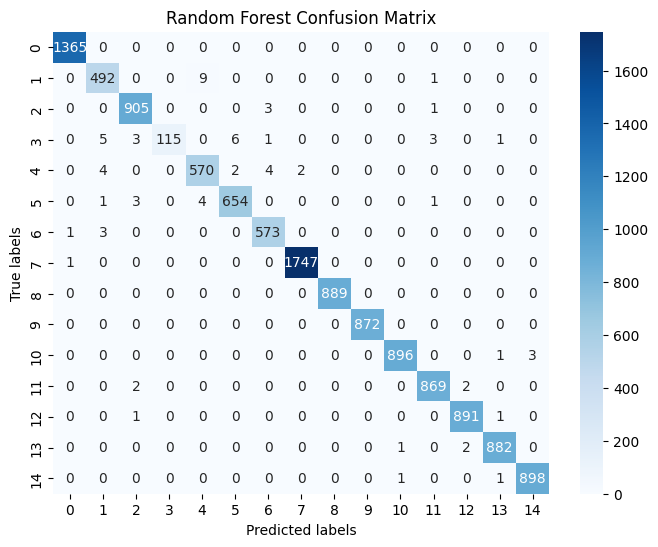

In [6]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, test_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 10})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [7]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(Y_test, test_predictions)

# Print classification report
print(report)

                 precision    recall  f1-score   support

      Dark Trap       1.00      1.00      1.00      1365
            Emo       0.97      0.98      0.98       502
         Hiphop       0.99      1.00      0.99       909
            Pop       1.00      0.86      0.92       134
            Rap       0.98      0.98      0.98       582
            RnB       0.99      0.99      0.99       663
     Trap Metal       0.99      0.99      0.99       577
Underground Rap       1.00      1.00      1.00      1748
            dnb       1.00      1.00      1.00       889
      hardstyle       1.00      1.00      1.00       872
      psytrance       1.00      1.00      1.00       900
      techhouse       0.99      1.00      0.99       873
         techno       1.00      1.00      1.00       893
         trance       1.00      1.00      1.00       885
           trap       1.00      1.00      1.00       900

       accuracy                           0.99     12692
      macro avg       0.99   

In [8]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(Y_train, train_predictions)

# Print classification report
print(report)

                 precision    recall  f1-score   support

      Dark Trap       1.00      1.00      1.00      3213
            Emo       1.00      1.00      1.00      1178
         Hiphop       1.00      1.00      1.00      2119
            Pop       1.00      1.00      1.00       327
            Rap       1.00      1.00      1.00      1266
            RnB       1.00      1.00      1.00      1436
     Trap Metal       1.00      1.00      1.00      1379
Underground Rap       1.00      1.00      1.00      4127
            dnb       1.00      1.00      1.00      2077
      hardstyle       1.00      1.00      1.00      2064
      psytrance       1.00      1.00      1.00      2061
      techhouse       1.00      1.00      1.00      2102
         techno       1.00      1.00      1.00      2063
         trance       1.00      1.00      1.00      2114
           trap       1.00      1.00      1.00      2087

       accuracy                           1.00     29613
      macro avg       1.00   

## KNN Model

In [9]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
train_predictions_KNN = model.predict(X_train)
test_predictions_KNN = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Training Set Accuracy:", accuracy_score(Y_train, train_predictions_KNN))
print("Test Set Accuracy:", accuracy_score(Y_test, test_predictions_KNN))

Training Set Accuracy: 0.9998649241887009
Test Set Accuracy: 0.9994484714780965


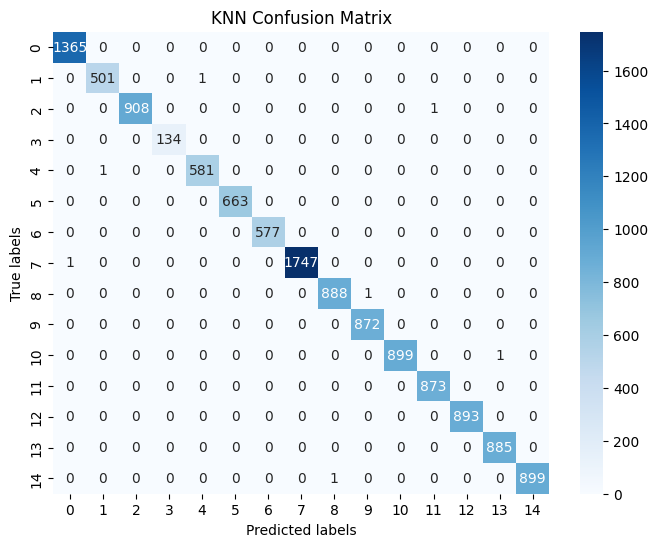

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, test_predictions_KNN)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 10})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('KNN Confusion Matrix')
plt.show()

In [11]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(Y_test, test_predictions_KNN)

# Print classification report
print(report)

                 precision    recall  f1-score   support

      Dark Trap       1.00      1.00      1.00      1365
            Emo       1.00      1.00      1.00       502
         Hiphop       1.00      1.00      1.00       909
            Pop       1.00      1.00      1.00       134
            Rap       1.00      1.00      1.00       582
            RnB       1.00      1.00      1.00       663
     Trap Metal       1.00      1.00      1.00       577
Underground Rap       1.00      1.00      1.00      1748
            dnb       1.00      1.00      1.00       889
      hardstyle       1.00      1.00      1.00       872
      psytrance       1.00      1.00      1.00       900
      techhouse       1.00      1.00      1.00       873
         techno       1.00      1.00      1.00       893
         trance       1.00      1.00      1.00       885
           trap       1.00      1.00      1.00       900

       accuracy                           1.00     12692
      macro avg       1.00   

In [12]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(Y_train, train_predictions_KNN)

# Print classification report
print(report)

                 precision    recall  f1-score   support

      Dark Trap       1.00      1.00      1.00      3213
            Emo       1.00      1.00      1.00      1178
         Hiphop       1.00      1.00      1.00      2119
            Pop       1.00      1.00      1.00       327
            Rap       1.00      1.00      1.00      1266
            RnB       1.00      1.00      1.00      1436
     Trap Metal       1.00      1.00      1.00      1379
Underground Rap       1.00      1.00      1.00      4127
            dnb       1.00      1.00      1.00      2077
      hardstyle       1.00      1.00      1.00      2064
      psytrance       1.00      1.00      1.00      2061
      techhouse       1.00      1.00      1.00      2102
         techno       1.00      1.00      1.00      2063
         trance       1.00      1.00      1.00      2114
           trap       1.00      1.00      1.00      2087

       accuracy                           1.00     29613
      macro avg       1.00   

In [13]:
# Calculate tempo variability
tempo_variability = X.std(axis=1)  # Calculate standard deviation along rows

# Add tempo variability as a new feature to your DataFrame
X['tempo_variability'] = tempo_variability

# Check the updated DataFrame
print(X.head())

   Unnamed: 0  danceability  energy  key  mode  speechiness  acousticness  \
0           0         0.831   0.814    2     1       0.4200        0.0598   
1           1         0.719   0.493    8     1       0.0794        0.4010   
2           2         0.850   0.893    5     1       0.0623        0.0138   
3           3         0.476   0.781    0     1       0.1030        0.0237   
4           4         0.798   0.624    2     1       0.2930        0.2170   

   instrumentalness  liveness  valence  duration_normal  tempo_normal  \
0          0.013400    0.0556   0.3890         0.136399      0.712629   
1          0.000000    0.1180   0.1240         0.245799      0.522402   
2          0.000004    0.3720   0.0391         0.108232      0.989832   
3          0.000000    0.1140   0.1750         0.135437      0.848645   
4          0.000000    0.1660   0.5910         0.135039      0.671787   

   loudness_normal  tempo_variability  
0         0.712039           0.562392  
1         0.715710